In [6]:
import seaborn as sns
import numpy as np 
import pandas as pd 
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import pathlib as path
from scipy import stats

In [3]:
#this is where all downladed data exists (after extracting the zip file)

#PATH_TO_DATA = path.Path(r'C:\Users\User\Desktop\visualpilot')
PATH_TO_DATA = path.Path.cwd().parent / 'data' #this is relational, assuming that this file runs from the analysis folder. 

# total number of batches to enter into the anaylsis
total_batches = [1,2,3]

In [4]:

filename = 'one_line_per_participant_all_info_valid_subjects_only.csv'
all_valid_subjects = pd.DataFrame([])
for batch in total_batches:
    PATH_PROCESED = PATH_TO_DATA / f'processed data{batch}' / filename
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    all_valid_subjects = pd.concat([all_valid_subjects,file])

In [5]:
#loading all oneline per participant (both qualificed and non qualified)
filename = 'one_line_per_participant_all_info_all_subject.csv'
all_subjects = pd.DataFrame([])
for batch in total_batches:
    PATH_PROCESED = PATH_TO_DATA / f'processed data{batch}' / filename
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    all_subjects = pd.concat([all_subjects,file])

Text(0, 0.5, 'RT')

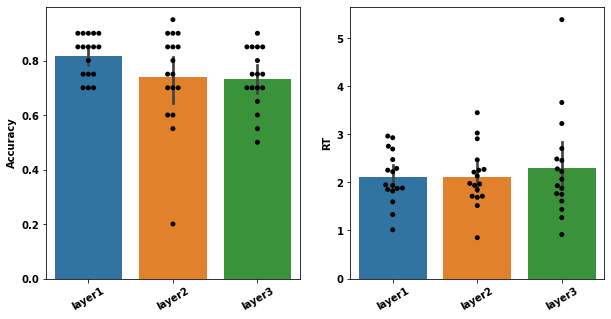

In [13]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data=all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0])
sns.swarmplot(data=all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')

sns.barplot(data=all_valid_subjects[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1])
sns.swarmplot(data=all_valid_subjects[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1],color='k')

axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].set_ylabel('RT')

### ANOVA 

In [14]:
temp = all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy','testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']]

df = pd.DataFrame({'patient': np.repeat(temp.index, 3),
                   'layer': np.tile([1, 2,3], temp.shape[0]),
                   'accuracy': temp[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']].to_numpy().ravel(),
                    'rt': temp[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']].to_numpy().ravel() })

# Conduct the repeated measures ANOVA
print(AnovaRM(data=df, depvar='accuracy',
              subject='patient', within=['layer']).fit())

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
layer  4.1448 2.0000 32.0000 0.0251



### CORRELATION 

In [15]:
curr_layer = df[df['layer'] == 2
               ]
curr_layer['accuracy'].corr(curr_layer['rt'])

0.31698539057348635

In [11]:
all_subjects.columns

Index(['demo_arrow_correct', 'demo_arrow_rt', 'demo_demo_accuracy',
       'demo_RT_overall_mean', 'demo_RT_incorrect_mean',
       'demo_RT_correct_mean', 'encoding_arrow_mean_rt',
       'encoding_arrow_accuracy', 'testing_Test_overall_accuracy',
       'testing_RT_overall_mean', 'testing_RT_incorrect_mean',
       'testing_RT_correct_mean', 'testing_layer_1_rt',
       'testing_layer_1_accuracy', 'testing_layer_2_rt',
       'testing_layer_2_accuracy', 'testing_layer_3_rt',
       'testing_layer_3_accuracy', 'testing_longest_response_strike',
       'demo_demo_accuracy.1', 'demo_arrow_correct.1',
       'encoding_arrow_accuracy.1', 'testing_longest_response_strike.1',
       'not_too_slow', 'not_too_Fast', 'WorkerId'],
      dtype='object')

### Testing the criterions

In [23]:
criterions=['demo_demo_accuracy.1', 'demo_arrow_correct.1',
       'encoding_arrow_accuracy.1', 'testing_longest_response_strike.1',
       'not_too_slow', 'not_too_Fast']

depvar='testing_Test_overall_accuracy'
for curr_criterion in criterions:
    passed=all_subjects.loc[all_subjects[curr_criterion]]
    failed=all_subjects.loc[~all_subjects[curr_criterion]]
    t,p=stats.ttest_ind(passed[depvar].values,failed[depvar].values)
    print(f'{curr_criterion} TTEST results: t({len(passed),len(failed)}) = {t:.3f}, p = {p:.3f} passed mean: {np.mean(passed[depvar].values):.2f}, failed mean: {np.mean(failed[depvar].values):.2f}')


demo_demo_accuracy.1 TTEST results: t((36, 43)) = 4.747, p = 0.000 passed mean: 0.72, failed mean: 0.60
demo_arrow_correct.1 TTEST results: t((42, 37)) = 2.175, p = 0.033 passed mean: 0.69, failed mean: 0.63
encoding_arrow_accuracy.1 TTEST results: t((36, 43)) = 2.443, p = 0.017 passed mean: 0.69, failed mean: 0.63
testing_longest_response_strike.1 TTEST results: t((67, 12)) = 4.568, p = 0.000 passed mean: 0.68, failed mean: 0.53
not_too_slow TTEST results: t((74, 5)) = -0.860, p = 0.392 passed mean: 0.65, failed mean: 0.70
not_too_Fast TTEST results: t((59, 20)) = 7.949, p = 0.000 passed mean: 0.71, failed mean: 0.52


read all subjects data in long format - remove the invalid participants and write the code per image: 


In [66]:

#loading all oneline per participant (both qualificed and non qualified)
filename = 'all_subjects_test_df.csv'
all_subjects_long_format = pd.DataFrame([])
for batch in total_batches:
    PATH_PROCESED = PATH_TO_DATA / f'processed data{batch}' / filename
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    all_subjects_long_format = pd.concat([all_subjects_long_format,file])

#last: read the encoding so we get a list of all target images to make life easier:
encoding_df=pd.read_csv(PATH_PROCESED.parent / 'all_subjects_encoding_df.csv',index_col=False)
target_images_list=list(encoding_df['target_image'].unique())
target_images_list.remove('left.jpg')
target_images_list.remove('right.jpg')

only_valid_subjects_long_format=all_subjects_long_format.loc[all_subjects_long_format['subject'].apply(lambda x: x in  all_valid_subjects.index)]

In [88]:

accuracy_per_img=[]
apearance_per_img=[]
left_accuracies=[]
left_occurences=[]
right_accuracties=[]
right_occurences=[]

for target_img in target_images_list: 
    curr_img_occurences=only_valid_subjects_long_format.loc[(only_valid_subjects_long_format['image1']==target_img) | (only_valid_subjects_long_format['image2']==target_img)]
    accuracy_per_img.append(curr_img_occurences['test_test_response.corr'].sum()/curr_img_occurences['test_test_response.corr'].count())
    apearance_per_img.append(curr_img_occurences['test_test_response.corr'].count())
    left_success=curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[0][0]
    left_accuracies.append(left_success)
    left_occurences.append(curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[0][1])




    right_success=curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[1][0]
    right_accuracties.append(right_success)
    right_occurences.append(curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[1][1])

images_behavior_df=pd.DataFrame(data={'overall_accuracy':accuracy_per_img,'left_occurence':left_occurences,'accuracy_when_left':left_accuracies,'right_occurence':right_occurences,'accuracy_when_right':right_accuracties},index=target_images_list)


<AxesSubplot:>

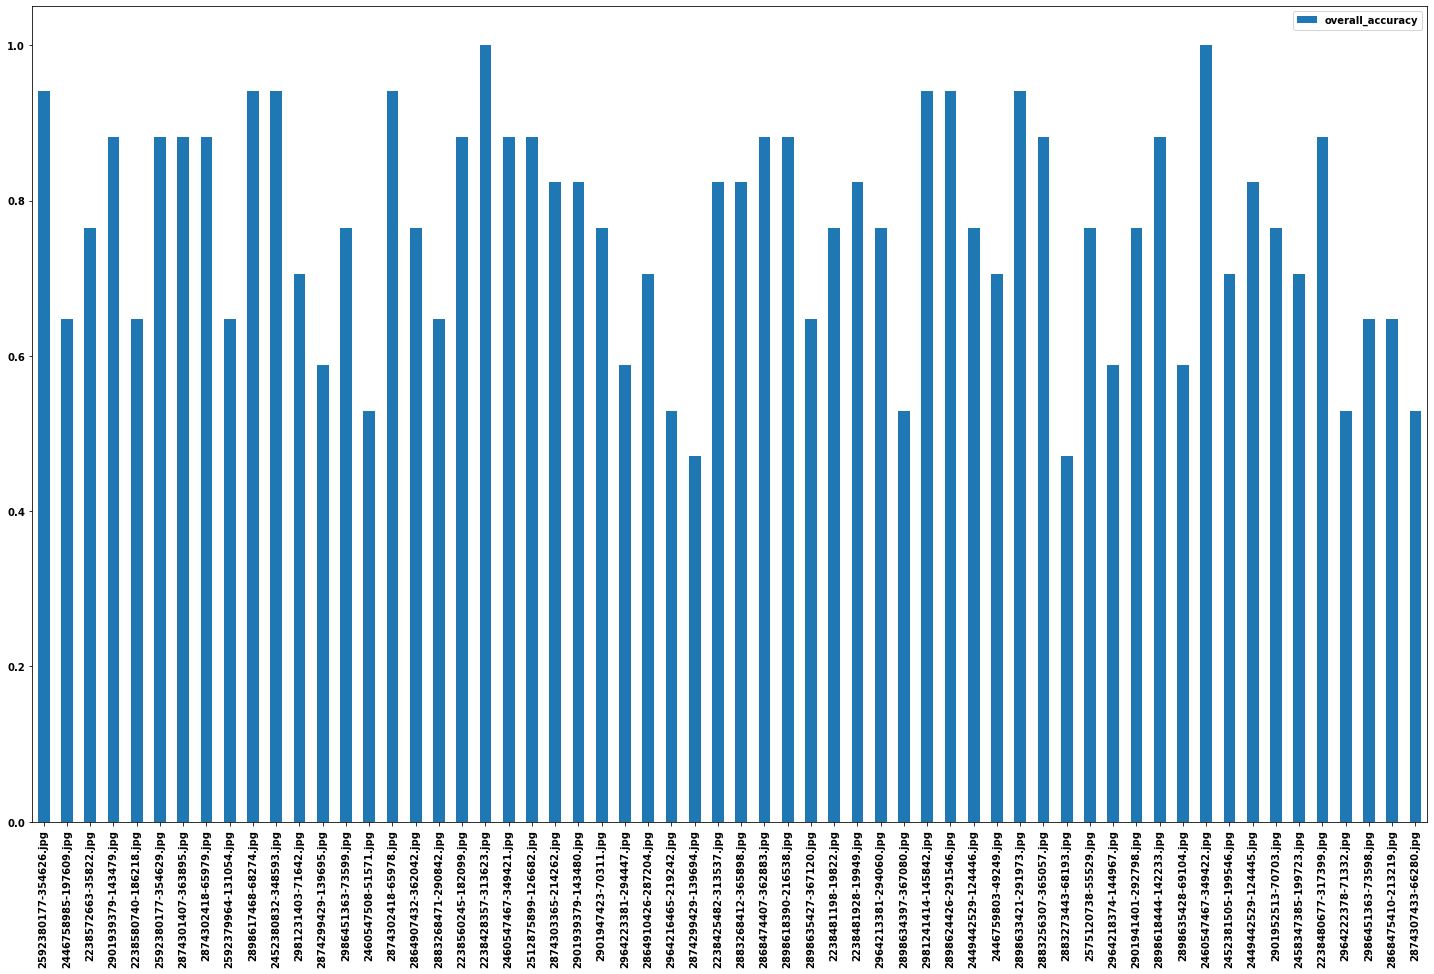

In [95]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
images_behavior_df.plot(kind='bar',y=['overall_accuracy'],ax=axes)
